In [1]:
import yfinance as yf
import pandas as pd

# Define the stock symbol and time period
stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'

# Fetch stock data from Yahoo Finance
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Resample data to a weekly frequency and calculate the mean
data_resampled = data.resample('W').mean()

# Handle missing values by forward-filling
data_resampled.fillna(method='ffill', inplace=True)

# Display the preprocessed data
print(data_resampled.head())


[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close       Volume
Date                                                                          
2020-01-05  74.173748  75.147499  73.961250  74.722500  72.892956  140901600.0
2020-01-12  75.431500  76.420000  75.092001  76.067000  74.204536  134018320.0
2020-01-19  78.502501  79.229001  77.998000  78.747499  76.819409  130411120.0
2020-01-26  79.621250  80.118748  79.154999  79.488127  77.541904  115921300.0
2020-02-02  79.429001  80.239499  78.274501  79.218001  77.278392  173346960.0


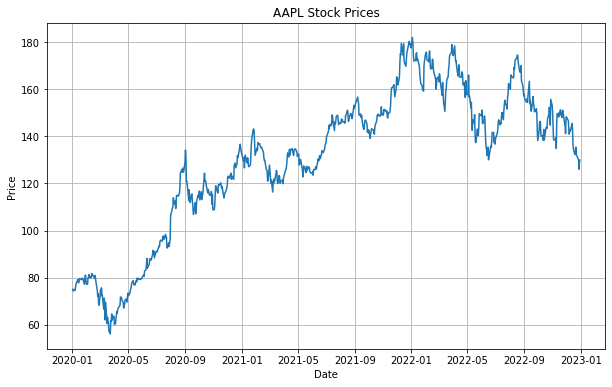

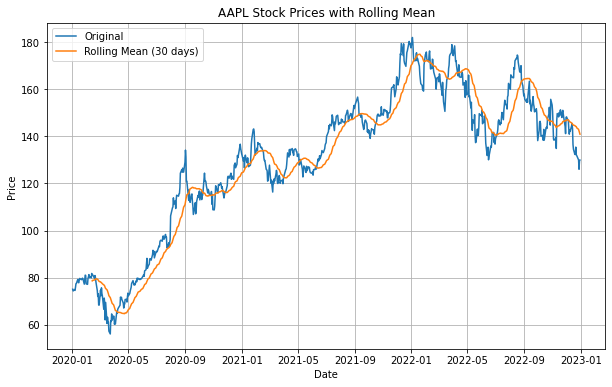

In [2]:
import matplotlib.pyplot as plt

# Plot stock prices over time
plt.figure(figsize=(10, 6))
plt.plot(data['Close'])
plt.title(f'{stock_symbol} Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Calculate rolling mean and plot
rolling_mean = data['Close'].rolling(window=30).mean()
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean (30 days)')
plt.title(f'{stock_symbol} Stock Prices with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


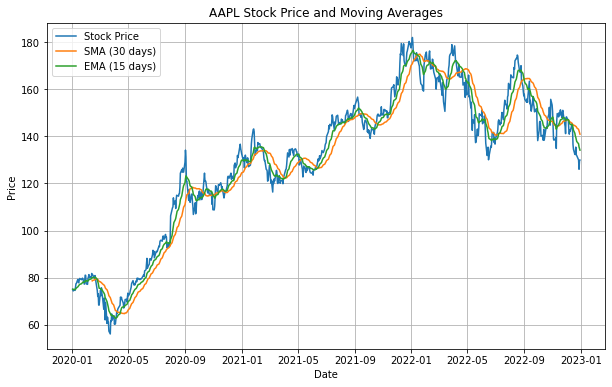

In [3]:
# Calculate Simple Moving Average (SMA)
sma_window = 30
data['SMA'] = data['Close'].rolling(window=sma_window).mean()

# Calculate Exponential Moving Average (EMA)
ema_window = 15
data['EMA'] = data['Close'].ewm(span=ema_window, adjust=False).mean()

# Plot stock prices and moving averages
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Stock Price')
plt.plot(data['SMA'], label=f'SMA ({sma_window} days)')
plt.plot(data['EMA'], label=f'EMA ({ema_window} days)')
plt.title(f'{stock_symbol} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\rifay\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\rifay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

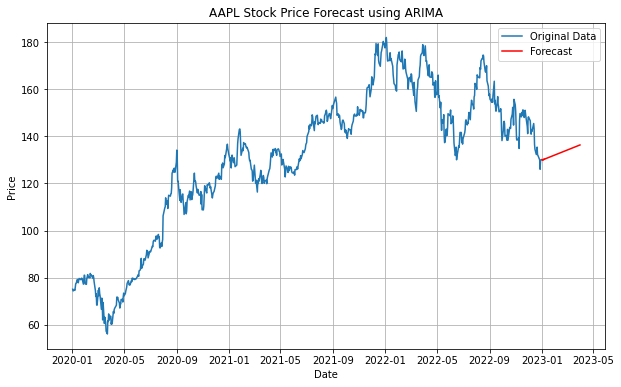

In [5]:
from statsmodels.tsa.arima_model import ARIMA

# Prepare data (using 'Close' prices)
data = data[['Close']]
data.dropna(inplace=True)

# Fit ARIMA model
model = ARIMA(data, order=(5, 1, 1))  # Example order
model_fit = model.fit(disp=0)

# Forecast future values
forecast_steps = 90
forecast, stderr, conf_int = model_fit.forecast(steps=forecast_steps)

# Plot original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.plot(pd.date_range(start=end_date, periods=forecast_steps, freq='D'), forecast, label='Forecast', color='red')
plt.title(f'{stock_symbol} Stock Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed


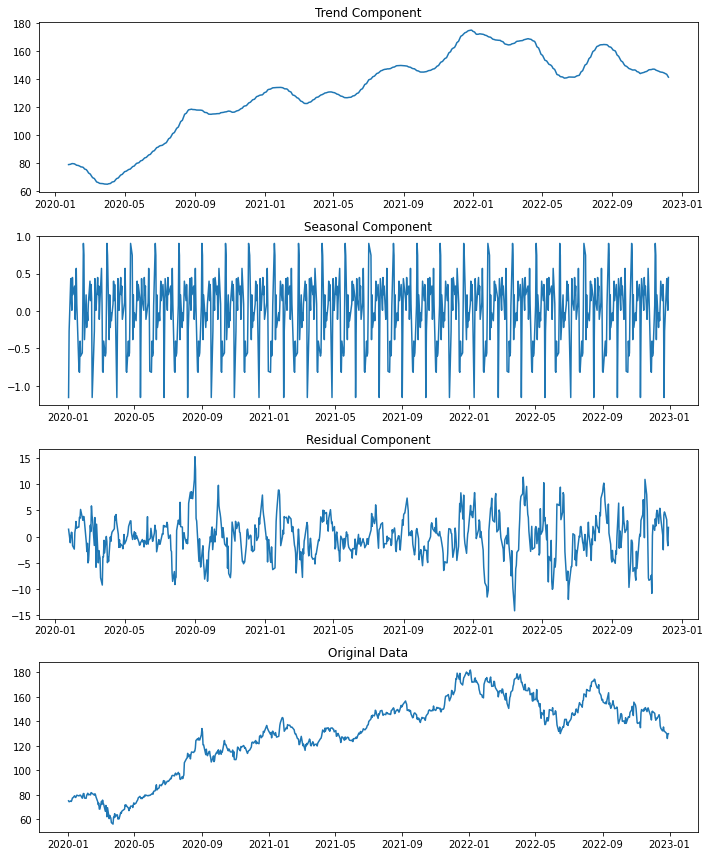

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply seasonal decomposition
result = seasonal_decompose(data, period=30)  # Example seasonal period

# Plot decomposition components
plt.figure(figsize=(10, 12))
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend Component')
plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonal Component')
plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual Component')
plt.subplot(4, 1, 4)
plt.plot(data)
plt.title('Original Data')
plt.tight_layout()
plt.show()

C:\Users\rifay\AppData\Local\Temp/ipykernel_14952/3588044027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Return'] = data['Close'].pct_change()
C:\Users\rifay\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005407. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\rifay\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After Septemb

Iteration:      1,   Func. Count:      6,   Neg. LLF: 35808784975644.37
Iteration:      2,   Func. Count:     18,   Neg. LLF: 4124631.4489898304
Iteration:      3,   Func. Count:     31,   Neg. LLF: 589826110597.1326
Iteration:      4,   Func. Count:     44,   Neg. LLF: 2134980.032414416
Iteration:      5,   Func. Count:     56,   Neg. LLF: 4841698308.364658
Iteration:      6,   Func. Count:     68,   Neg. LLF: 1068565.120178921
Iteration:      7,   Func. Count:     80,   Neg. LLF: 30699219718.041145
Iteration:      8,   Func. Count:     92,   Neg. LLF: -1843.9073894303478
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1843.9073882652933
            Iterations: 12
            Function evaluations: 92
            Gradient evaluations: 8


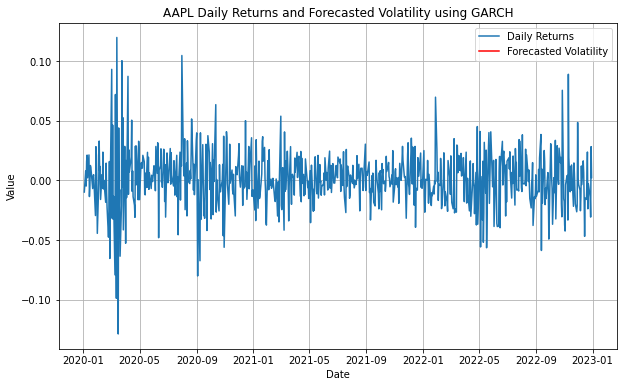

In [15]:
from arch import arch_model

# Calculate daily returns
data['Return'] = data['Close'].pct_change()
data.dropna(inplace=True)

# Fit GARCH(1, 1) model
model = arch_model(data['Return'], vol='Garch', p=1, q=1)
results = model.fit()

# Forecast volatility
forecast_horizon = 30
forecast = results.forecast(start=len(data), horizon=forecast_horizon)

# Plot original returns and forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(data['Return'], label='Daily Returns')
plt.plot(forecast.variance.values[-1, :], label='Forecasted Volatility', color='red')
plt.title(f'{stock_symbol} Daily Returns and Forecasted Volatility using GARCH')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed


C:\Users\rifay\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\rifay\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        Future

MAE: 10.11
RMSE: 12.60


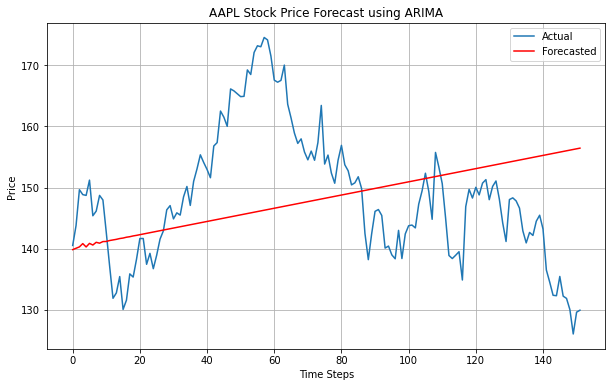

In [18]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data into training and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 1))
model_fit = model.fit(disp=0)

# Forecast future values
forecast_steps = len(test)
forecast, stderr, conf_int = model_fit.forecast(steps=forecast_steps)

# Calculate evaluation metrics
actual_values = test['Close'].values
mae = mean_absolute_error(actual_values, forecast)
rmse = mean_squared_error(actual_values, forecast, squared=False)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

# Plot actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual')
plt.plot(forecast, label='Forecasted', color='red')
plt.title(f'{stock_symbol} Stock Price Forecast using ARIMA')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
